# Pendahuluan
Nurul Jannah (personal.nuruljannah@gmail.com)

Berikut Pemodelan Jaringan Syaraf Tiruan untuk Klasifikasi Gambar *rock, paper, scissors* yang saya susun untuk memenuhi syarat lulus kelas 'Belajar Machine Learning untuk Pemula'.

# Import Modul
Pada bagian ini akan di import beberapa modul yang diperlukan dalam pemodelan jaringan syaraf tiruan untuk klasifikasi gambar menggunakan Tensorflow.

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mengakses Dataset
1. Mengunduh Dataset

Mengunduh dataset *rock-paper-scisscors* yang telah disediakan dicoding.

In [2]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-05 10:00:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.3’

rockpaperscissors.z 100%[===================>] 307.92M  6.80MB/s    in 60s     

2021-07-05 10:01:44 (5.10 MB/s) - ‘rockpaperscissors.zip.3’ saved [322873683/322873683]



2. Mengekstrak file zip

Mengekstrak dataset yang telah diunduh sebelumnya.

In [3]:
import os
import zipfile

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
base_dir = '/content/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

# Membuat Objek ImageDataGenerator
Pada tahap ini akan dibuat objek ImageDataGenerator untuk data training dan data validation. Tujuan dari pembuatan objek ini adalah untuk mempersiapkan data latih dan data validasi yang akan diberikan ke model.

In [5]:
#!rm -rf /content/rockpaperscissors/rps-cv-images/.ipynb_checkpoints

Kode di bawah menunjukkan proses augmentasi gambar pada setiap sampel di dataset. Hal ini bertujuan untuk memperkaya dataset dengan menciptakan data-data baru dari data yang telah ada. Selain itu, pada tahap ini dilakukan pemisahan dataset menjadi data training dan data validation dengan rasio 60% untuk data training dan 40% untuk data validation.

In [6]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 20,
                  horizontal_flip = True,
                  vertical_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'wrap',
                  validation_split = 0.4)

val_datagen = ImageDataGenerator(
               rescale = 1./255,
               rotation_range = 20,
               horizontal_flip = True,
                vertical_flip = True,
                shear_range = 0.2,
                fill_mode = 'wrap',
                validation_split = 0.4)

In [7]:
train_generator = train_datagen.flow_from_directory(
                    base_dir,
                    target_size = (150,150),
                    color_mode = 'grayscale',
                    batch_size = 32,
                    shuffle = True,
                    subset ='training',
                    class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(
                    base_dir,
                    target_size = (150,150),
                    color_mode = 'grayscale',
                    batch_size = 32,
                    shuffle = True,
                    subset = 'validation',
                    class_mode = 'categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Membangun Arsitektur CNN
Pada tahap ini akan dibuat suatu model Sequential dengan memanfaatkan algoritma CNN.

In [8]:
model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),                                    
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),                                    
        tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),                            
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')])

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [10]:
# Melatih model

history = model.fit(
          train_generator,
          steps_per_epoch = 25,
          epochs = 25,
          validation_data = val_generator,
          validation_steps = 5,
          verbose = 2)

Epoch 1/25
25/25 - 7s - loss: 1.1144 - accuracy: 0.3063 - val_loss: 1.0987 - val_accuracy: 0.3313
Epoch 2/25
25/25 - 3s - loss: 1.0992 - accuracy: 0.3481 - val_loss: 1.0929 - val_accuracy: 0.3750
Epoch 3/25
25/25 - 3s - loss: 1.0932 - accuracy: 0.3532 - val_loss: 1.0787 - val_accuracy: 0.3187
Epoch 4/25
25/25 - 3s - loss: 0.8753 - accuracy: 0.5078 - val_loss: 0.8163 - val_accuracy: 0.4938
Epoch 5/25
25/25 - 3s - loss: 0.7337 - accuracy: 0.6650 - val_loss: 0.6554 - val_accuracy: 0.6687
Epoch 6/25
25/25 - 3s - loss: 0.6540 - accuracy: 0.6975 - val_loss: 0.5836 - val_accuracy: 0.8062
Epoch 7/25
25/25 - 3s - loss: 0.6000 - accuracy: 0.7325 - val_loss: 0.5623 - val_accuracy: 0.7875
Epoch 8/25
25/25 - 3s - loss: 0.4178 - accuracy: 0.8519 - val_loss: 0.3448 - val_accuracy: 0.8875
Epoch 9/25
25/25 - 3s - loss: 0.3237 - accuracy: 0.8909 - val_loss: 0.3127 - val_accuracy: 0.9062
Epoch 10/25
25/25 - 3s - loss: 0.3073 - accuracy: 0.9025 - val_loss: 0.1699 - val_accuracy: 0.9438
Epoch 11/25
25/25 -

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (5).png
00nKV8oHuTGi20gq.png
rock


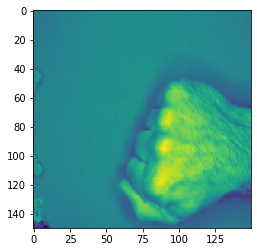

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  
  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size = (150, 150), color_mode = 'grayscale')
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')